# Тестовая задача. Номинация - Big Data.

## Первичный анализ данных

В этом задании мы будем использовать данные SOCR по росту и весу 25 тысяч подростков.

[1] Считываем данные по росту и весу (weights_heights.csv, приложенный в задании) в объект DataFrame:

In [1]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

In [2]:
data = DataFrame.from_csv('weights_heights.csv')

[2] Постройте 2 раздельные гистограммы распределения роста и веса подростков из выборки data. Выделите параметры разным цветом и подпишите оси.

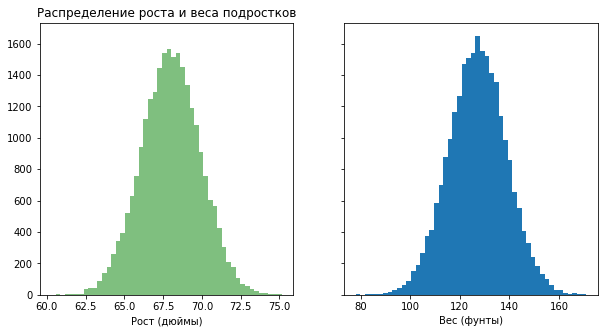

In [3]:
plt.close('all')
f, axarr = plt.subplots(1,2, sharey=True, figsize=(10,5))
axarr[0].hist(data['Height'].tolist(), bins=50, alpha=0.5, facecolor='green')
axarr[0].set_title(u'Распределение роста и веса подростков')
axarr[0].set_xlabel(u'Рост (дюймы)')
axarr[1].hist(data['Weight'].tolist(), bins=50)
axarr[1].set_xlabel(u'Вес (фунты)')
plt.show()

[3.1] Добавьте третий признак ('BMI'). Создайте признак Индекс массы тела (BMI). Для этого воспользуйтесь коэффициентами перевода единиц с точностью до 5 знака после запятой.

In [4]:
def bmi(height, weight):
    return (weight/height**2)*703

In [5]:
data['BMI'] = [round(bmi(row[0], row[1]), 5) for i, row in data.iterrows()]

[3.2] Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга.

In [6]:
data[['Height', 'Weight', 'BMI']].corr()

,Height,Weight,BMI
Height,1.000000,0.502859,-0.121519
Weight,0.502859,1.000000,0.795477
BMI,-0.121519,0.795477,1.000000


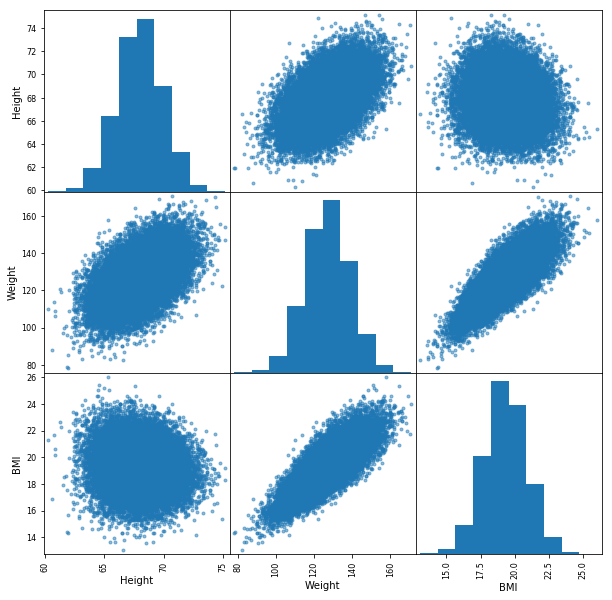

In [7]:
plt.close('all')
scatter_matrix(data[['Height', 'Weight', 'BMI']], figsize=(10, 10))
plt.show()

[4]. Создайте в DataFrame data новый признак weight_category, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте boxplot, демонстрирующий зависимость роста от весовой категории. Подпишите ось y меткой «Рост», ось x – меткой «Весовая категория».

In [8]:
def weight_category(weight):
    if weight < 120:
        return 1
    if weight >= 150:
        return 3
    return 2

In [9]:
data['weight_category'] = [weight_category(row[1]) for i, row in data.iterrows()]

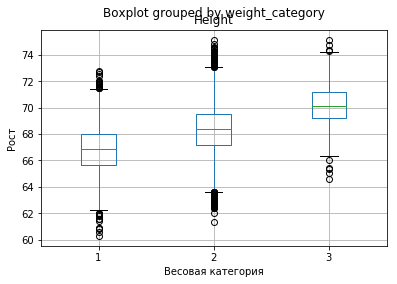

In [10]:
plt.close('all')
ax = data[['Height', 'weight_category']].boxplot(column='Height', by='weight_category')
ax.set(xlabel= u'Весовая категория', ylabel=u'Рост')
plt.show()

[5]. Постройте scatter plot зависимости роста от веса. Подпишите картинку.

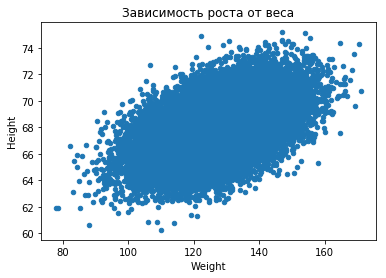

In [11]:
plt.close('all')
data.plot(kind='scatter', x='Weight', y='Height')
plt.title(u'Зависимость роста от веса')
plt.show()

In [12]:
weight_min = int(data['Weight'].min())
weight_max = int(data['Weight'].max()) + 1
print 'Weight min =', weight_min
print 'Weight max =', weight_max

Weight min = 78
Weight max = 171


## Минимизация квадратичной ошибки

[6]. Напишите функцию, которая по двум параметрам `w_0` и `w_1` вычисляет квадратичную ошибку приближения зависимости роста `y` от веса `x` прямой линией `y = w_0 + w_1*x`.

In [13]:
def sd(x, y, w_0, w_1):
    """Standard deviation."""
    s = 0
    for i,x_i in enumerate(x):
        s += (y[i] - (w_0 + w_1*x[i]))**2
    return s

In [14]:
print sd(data['Weight'].values, data['Height'].values, 55, 0.04)

1637721.0998


In [15]:
def approximation(x, w_0, w_1):
    return w_0 + w_1*x

[7]. Проведите на графике из п.5 две прямые, соответствующие значениям параметром `(w_0, w_1) = (55, 0.04)` и `(w_0, w_1) = (50, 0.22)`. Подпишите оси и график.

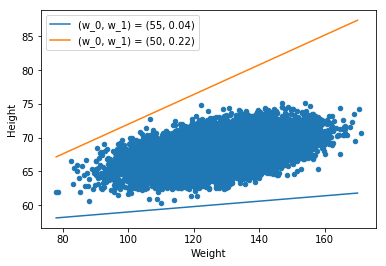

In [16]:
plt.close('all')
data.plot(kind='scatter', x='Weight', y='Height')
t = np.arange(weight_min, weight_max, 1)
plt.plot(t, approximation(t, 55, 0.04), '-', label='(w_0, w_1) = (55, 0.04)')
plt.plot(t, approximation(t, 50, 0.22), '-', label='(w_0, w_1) = (50, 0.22)')
plt.legend(loc='upper left')
plt.show()

[8]. Постройте график зависимости функции ошибки, посчитанной в п.6, от параметра w_1 при w_0 = 50. Подпишите оси и график. 

In [17]:
w_0 = 50
w_1_line = np.arange(-5, 5, 0.01)
sd_variation_w_1 = [sd(data['Weight'].values, data['Height'].values, w_0, w_1) for w_1 in w_1_line]

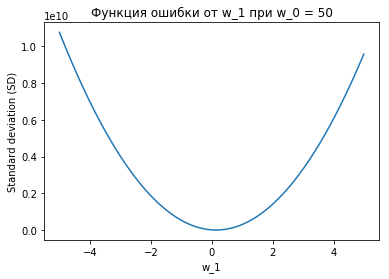

In [18]:
plt.close('all') 
plt.plot(w_1_line, sd_variation_w_1, '-')
plt.title(u'Функция ошибки от w_1 при w_0 = 50')
plt.xlabel('w_1')
plt.ylabel('Standard deviation (SD)')
plt.show()

[9]. Найдите минимум функции, определенной в п.6, для значений параметра `w_1` в диапозоне [-5,5].

In [19]:
index_min = sd_variation_w_1.index(min(sd_variation_w_1))
w_1_opt = w_1_line[index_min]
print 'w_1_opt = %.2f, sd = %.2f' % (w_1_opt, sd_variation_w_1[index_min])

w_1_opt = 0.14, sd = 79997.74


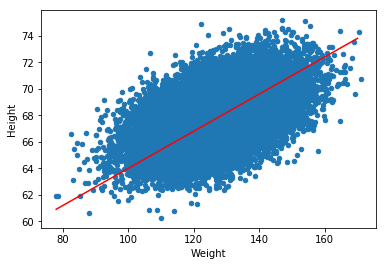

In [20]:
plt.close('all')
data.plot(kind='scatter', x='Weight', y='Height')
t = np.arange(weight_min, weight_max, 1)
plt.plot(t, approximation(t, w_0, w_1_opt), '-', color='red')
plt.show()

[10]. Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров `w_0` и `w_1`.

In [21]:
w_0_line = np.arange(40, 60, 1)
w_1_line = np.arange(-1, 1, 0.01)

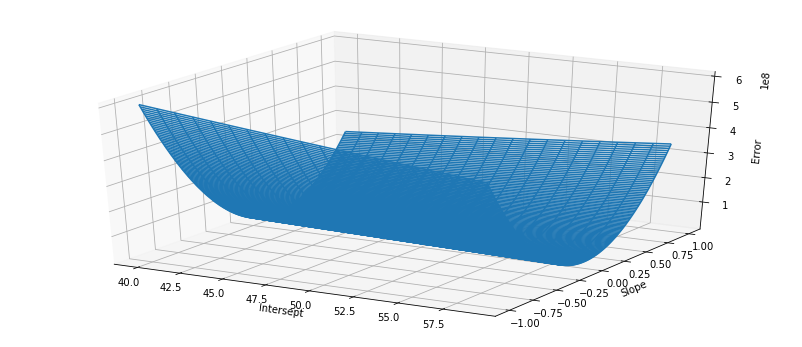

In [22]:
from mpl_toolkits.mplot3d import axes3d

plt.close('all')
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111, projection='3d')
X,Y = np.meshgrid(w_0_line, w_1_line)
Z = sd(data['Weight'].values, data['Height'].values, X,Y)
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax.set_xlabel('Intersept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

[11]. Метод оптимизации алгоритмом Бройдена-Флетчера-Гольдфарба-Шанно

In [23]:
from scipy.optimize import fmin_l_bfgs_b

In [24]:
initial_values = np.array([0.0, 0.0])
bounds = [(-100,100), (-5,5)]

In [25]:
def sd_wrap(params):
    w_0, w_1 = params
    return sd(data['Weight'].values, data['Height'].values, w_0, w_1)

In [26]:
fmin_l_bfgs_b(sd_wrap, x0=initial_values, bounds=bounds, approx_grad=True)

(array([ 57.57171454,   0.08200697]),
 67545.287085290838,
 {'funcalls': 51,
  'grad': array([-0.04802132, -0.93132257]),
  'nit': 12,
  'task': 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
  'warnflag': 0})

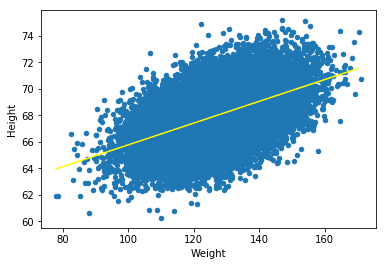

In [27]:
w_0 = 57.57171454
w_1 = 0.08200697
plt.close('all')
data.plot(kind='scatter', x='Weight', y='Height')
t = np.arange(weight_min, weight_max, 1)
plt.plot(t, approximation(t, w_0, w_1), '-', color='yellow')
plt.show()